# Credit Card Fraud Detection

## Introduction

Credit card fraud is a significant concern in the financial industry. It is essential for credit card companies to effectively identify and prevent fraudulent transactions to protect their customers from unauthorized charges. The primary objective of this project is to utilize credit card details to detect and prevent fraudulent transactions.

## What is Credit Card Fraud?

Credit card fraud occurs when someone illicitly uses your credit card number or a stolen physical card to make unauthorized financial transactions from your account without your knowledge or consent.

## The Dataset

To conduct this analysis, we will use a real-world dataset available on Kaggle. This dataset contains credit card transactions made by European cardholders in September 2013. It provides a valuable resource for studying credit card fraud detection.

### Dataset Details

- The dataset covers transactions that took place over two days, including 492 fraudulent transactions out of a total of 284,807 transactions. It's important to note that this dataset is highly imbalanced, with fraudulent transactions accounting for only 0.172% of all transactions.

- The dataset consists of numerical input variables derived from a Principal Component Analysis (PCA) transformation. Unfortunately, the original features and background information are not provided due to confidentiality constraints. 

- The features V1 through V28 represent the principal components obtained from the PCA. The 'Time' feature represents the seconds elapsed between each transaction and the first transaction in the dataset, while the 'Amount' feature denotes the transaction amount. The 'Class' feature serves as the response variable, taking a value of 1 in the case of fraud and 0 otherwise.

This project aims to apply data analysis and machine learning techniques to identify patterns and anomalies in this dataset and develop a credit card fraud detection model.

By leveraging this dataset, we can explore the features and apply various machine learning algorithms to improve fraud detection and minimize false positives, thus enhancing the security of credit card transactions.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
pd.options.display.max_columns = None

## Display the Top 5 Rows of the Dataset

To view the first 5 rows of the dataset:

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Check the Last 5 Rows of the Dataset

To view the last 5 rows of the dataset:

In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Find the Shape of the Dataset

To determine the number of rows and columns in the dataset:

In [6]:
data.shape

(284807, 31)

In [7]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 284807
Number of Columns: 31


## Obtain Information about the Dataset

To gather essential details about the dataset, including the total number of rows, total number of columns, datatypes of each column, and memory requirement:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Check for Null Values in the Dataset

To identify if there are any missing (null) values in the dataset:

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Let's begin by displaying the first 5 rows of our dataset to get an initial overview.

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Feature Scaling for 'Amount' Column

As observed, most of the feature values in our dataset are within a similar range, except for the 'Amount' column. To ensure consistency and avoid any bias in our analysis, we will perform feature scaling specifically on the 'Amount' column.

We will use the StandardScaler from the scikit-learn library for this purpose.

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


The 'Amount' column is now standardized, bringing it to the same scale as the other features.

## Removing the 'Time' Column

At first glance, the 'Time' column may seem like an external deciding factor in our analysis. However, for our modeling process, we have decided to exclude it. 

We will proceed by removing the 'Time' column from our dataset.

In [14]:
data = data.drop(['Time'], axis=1)

data.head()

## Checking for Duplicate Values

Before proceeding further, let's check for duplicate values in our dataset. Initially, our dataset consisted of 284,807 transactions. 

To confirm the presence of duplicate transactions:

In [15]:
data.duplicated().any()

True

If the output is True, it indicates the presence of duplicate values in our dataset.

Now, let's proceed to remove the duplicates from the dataset:

In [16]:
data = data.drop_duplicates()

After removing duplicates, we can calculate the difference in the number of transactions to understand how many duplicates were removed:

In [17]:
284807 - 275663

9144

As you can see, we successfully removed approximately 9,144 duplicate transactions. Our dataset is now free from duplicates, and we have also ensured that there are no missing values. We are ready to continue with our analysis.

## Checking the Distribution of the Target Variable 'Class'

Before proceeding, let's examine the distribution of our target variable 'Class' in our dataset. To see the count of each class:

In [18]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

However, it's often better practice to visualize the distribution. For this purpose, we'll use the Seaborn library to create a count plot:

In [19]:
import seaborn as sns

<Axes: ylabel='count'>

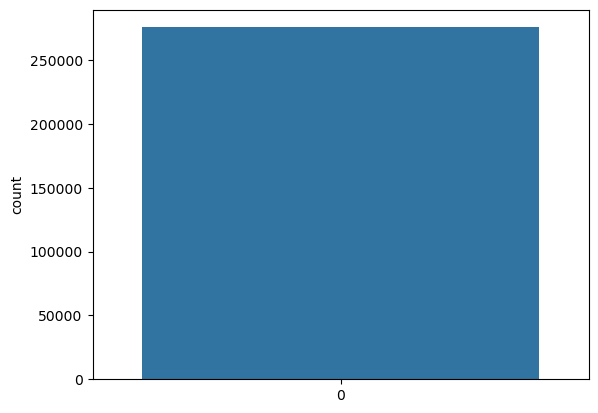

In [20]:
sns.countplot(data['Class'])

As you can observe from the plot, our dataset is highly imbalanced. But what does an imbalanced dataset mean?

### What Does an Imbalanced Dataset Mean?

An imbalanced dataset refers to a type of dataset where the target class has an uneven distribution of observations. In our case, 'Class' represents the target variable, and it has two classes: one class with a very high number of observations (majority class) and the other with a very low number of observations (minority class).

Here, the '1' class is considered the minority class, while the '0' class is the majority class.

Let's explore the consequences of not handling an imbalanced dataset.

## Storing Feature Matrix and Response (Target)

To proceed with our analysis, we will create a feature matrix 'X' and a response vector 'y' from our dataset. The feature matrix 'X' will contain all the relevant features, while the response vector 'y' will hold the 'Class' variable, which is our target.

In [21]:
X = data.drop('Class', axis=1)
y = data['Class']

## Splitting the Dataset into Training and Test Sets

To evaluate the performance of our machine learning models, we will split our dataset into two distinct sets: one for training and one for testing. This allows us to train our models on one portion of the data and assess their performance on another, unseen portion.

We will use the `train_test_split` function from scikit-learn to perform this split.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

With the provided code, we have successfully divided our dataset into two crucial sets:

- **X_train** and **y_train**: These sets are designated for training our machine learning models. The features are stored in **X_train**, while the corresponding target variable, 'Class,' is stored in **y_train**. Our models will be trained on this data.

- **X_test** and **y_test**: These sets are reserved for making predictions. We will utilize **X_test** as input for our models, generate predictions, and then compare these predictions with **y_test**. **y_test** contains our actual values, allowing us to assess the performance of our machine learning models.

As previously noted, our dataset exhibits class imbalance. We will address this issue shortly by exploring oversampling and undersampling techniques. However, before doing so, let's first understand the consequences of not handling the imbalanced dataset.

## Logistic Regression Model

For our initial approach, we will use a logistic regression model. Since the target variable in our dataset contains categorical values (0 and 1), this is a binary classification problem. We'll employ various classification algorithms, and we'll begin with logistic regression.

To train the logistic regression model:

In [23]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

Now that our logistic regression model has been trained, we can use it to make predictions on our test set. Predictions are stored in the variable `y_pred1`.

In [24]:
y_pred1 = log.predict(X_test)

To assess the accuracy of our logistic regression model, we will use the `accuracy_score` metric from scikit-learn. The accuracy score compares the actual values (in `y_test`) with the predicted values (in `y_pred1`) generated by our model.

To calculate the accuracy score:

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred1)

0.9992200678359603

As you've observed, the logistic regression model demonstrates an accuracy of approximately 99% on our dataset.
To assess the precision, recall, and F1 score of our logistic regression model, we will use the respective metrics provided by scikit-learn. Each of these metrics takes both the actual values (in `y_test`) and the predicted values (in `y_pred1`) generated by our logistic regression model.

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

To calculate the precision score:

In [27]:
precision_score(y_test, y_pred1)

0.8870967741935484

To calculate the recall score:

In [28]:
recall_score(y_test, y_pred1)

0.6043956043956044

To calculate the F1 score:

In [29]:
f1_score(y_test, y_pred1)

0.718954248366013

As observed, the precision, recall, and F1 scores are notably lower compared to accuracy. This discrepancy is primarily due to the imbalanced nature of our dataset. It is essential to consider precision, recall, and F1 score, especially when dealing with imbalanced datasets, as these metrics provide a more comprehensive assessment of model performance.

## Handling the Imbalanced Dataset

To address the issue of an imbalanced dataset, we can employ two primary techniques: undersampling and oversampling. In this section, we will start with undersampling, which involves randomly removing rows from the majority class to balance it with the minority class. This process helps prevent bias towards the majority class.

### Undersampling Technique

First, let's separate the normal and fraudulent transactions into two separate variables:

In [30]:
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

We can determine the number of transactions in each category:

In [31]:
normal.shape

(275190, 30)

This shows the total number of normal transactions in our dataset. Similarly, we can check the number of fraudulent transactions:

In [32]:
fraud.shape

(473, 30)

Now, let's perform undersampling by randomly selecting a subset of normal transactions to match the number of fraudulent transactions. We will select 473 random samples from the normal transactions to achieve this balance:

In [33]:
normal_sample = normal.sample(n=473)

The `normal_sample` variable comprises 473 randomly selected transactions from the normal category.

In [34]:
normal_sample.shape

(473, 30)

As observed, we have successfully performed undersampling, resulting in 473 normal transactions and 473 fraudulent transactions. To create a balanced dataset, we can concatenate these two subsets of data.

In [35]:
new_data = pd.concat([normal_sample, fraud])

We have successfully merged the undersampled normal transactions and fraudulent transactions into the `new_data` variable. This action results in a balanced dataset that is now prepared for further analysis and modeling.

To verify the distribution of the target variable 'Class' in our balanced dataset, we can utilize the `value_counts` function from the Pandas library. This function will display the count of each class in the 'Class' variable.

In [36]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

Now that we have successfully balanced the dataset, let's take a look at the first few rows of our newly created `new_data` dataframe to get a sense of its structure and content.

In [37]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244830,1.862977,-0.786392,-0.058865,0.191037,-0.948697,0.193179,-1.072884,0.320416,1.284783,0.160609,0.634791,0.378870,-1.049264,0.102118,0.241635,0.935425,-0.827122,0.696004,-0.027752,-0.134366,0.091757,0.201352,0.328057,0.759735,-0.668731,0.425423,-0.035864,-0.036315,-0.161921,0
207724,0.165437,0.445860,-0.328321,0.192118,0.798749,-0.000433,0.596189,-0.050070,0.575519,-1.103317,-2.094682,-0.050325,0.519974,-1.868866,-1.410397,-0.180827,0.711295,0.634579,0.627574,0.056438,0.228709,1.045387,-0.291462,-0.986326,-0.185812,0.676513,0.123948,0.118457,-0.171996,0
155381,-0.419634,0.747052,0.382097,-0.608255,1.243116,-0.003526,0.674151,-0.008277,1.066342,-0.753224,1.036416,-1.732552,1.843924,1.457647,-2.509776,-0.299414,0.175916,0.484542,0.246246,0.055195,0.066396,0.702314,-0.335604,0.390440,0.009797,0.606118,0.307896,0.207374,-0.350351,0
3209,-0.415426,0.673509,1.210091,-2.102860,0.137877,-1.294730,1.081153,-0.314013,0.546929,-0.983688,1.554804,1.026021,-0.251280,0.271507,0.158784,-0.448166,-0.751806,0.460596,0.110685,0.040063,0.126549,0.711798,-0.284272,0.543640,0.018714,-0.869842,0.235878,-0.021606,-0.349231,0
138981,-0.825853,1.093659,1.207936,0.439296,-0.138087,-0.033251,0.014841,0.554959,-1.003188,-0.221174,1.443746,0.866983,0.150603,0.751675,0.872862,-0.165548,0.140128,-0.144513,0.941286,-0.068484,-0.007313,-0.190885,0.151738,0.015689,-0.684919,0.169889,-0.124081,0.061329,-0.348072,0


As observed, the `new_data` dataframe has random indexes. To ensure a consistent and sequential index, we can reset the indexes.

In [38]:
new_data = pd.concat([normal_sample, fraud], ignore_index=True)

This will reset the indexes in the `new_data` dataframe.

Now, let's examine the distribution of the target variable 'Class' in the updated undersampled dataset:

In [39]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

Additionally, let's take another look at the first few rows of the `new_data` dataframe:

This will display the initial content of the updated undersampled dataset with sequential indexes.

In [40]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.862977,-0.786392,-0.058865,0.191037,-0.948697,0.193179,-1.072884,0.320416,1.284783,0.160609,0.634791,0.378870,-1.049264,0.102118,0.241635,0.935425,-0.827122,0.696004,-0.027752,-0.134366,0.091757,0.201352,0.328057,0.759735,-0.668731,0.425423,-0.035864,-0.036315,-0.161921,0
1,0.165437,0.445860,-0.328321,0.192118,0.798749,-0.000433,0.596189,-0.050070,0.575519,-1.103317,-2.094682,-0.050325,0.519974,-1.868866,-1.410397,-0.180827,0.711295,0.634579,0.627574,0.056438,0.228709,1.045387,-0.291462,-0.986326,-0.185812,0.676513,0.123948,0.118457,-0.171996,0
2,-0.419634,0.747052,0.382097,-0.608255,1.243116,-0.003526,0.674151,-0.008277,1.066342,-0.753224,1.036416,-1.732552,1.843924,1.457647,-2.509776,-0.299414,0.175916,0.484542,0.246246,0.055195,0.066396,0.702314,-0.335604,0.390440,0.009797,0.606118,0.307896,0.207374,-0.350351,0
3,-0.415426,0.673509,1.210091,-2.102860,0.137877,-1.294730,1.081153,-0.314013,0.546929,-0.983688,1.554804,1.026021,-0.251280,0.271507,0.158784,-0.448166,-0.751806,0.460596,0.110685,0.040063,0.126549,0.711798,-0.284272,0.543640,0.018714,-0.869842,0.235878,-0.021606,-0.349231,0
4,-0.825853,1.093659,1.207936,0.439296,-0.138087,-0.033251,0.014841,0.554959,-1.003188,-0.221174,1.443746,0.866983,0.150603,0.751675,0.872862,-0.165548,0.140128,-0.144513,0.941286,-0.068484,-0.007313,-0.190885,0.151738,0.015689,-0.684919,0.169889,-0.124081,0.061329,-0.348072,0


For the newly created dataset after undersampling, we need to store the feature matrix 'X' and the target variable 'y' for machine learning. These variables will enable us to train and evaluate our models.

In [41]:
X = new_data.drop('Class', axis=1)
y = new_data['Class']

With 'X' containing the features and 'y' holding the target variable, we can proceed to perform the train-test split, a crucial step that enables us to evaluate the performance of our machine learning models.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##  Logistic Regression Model After Undersampling

Now that our dataset is prepared and balanced through undersampling, we are ready to execute our first machine learning algorithm, logistic regression. We will train a logistic regression model and proceed to evaluate its accuracy on the undersampled dataset.

Let's train a logistic regression model and assess its accuracy:

In [43]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred1 = logistic_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred1)

0.9105263157894737

To calculate the precision score:

In [44]:
precision_score(y_test, y_pred1)

0.9207920792079208

To calculate the recall score:

In [45]:
recall_score(y_test, y_pred1)

0.9117647058823529

To calculate the F1 score:

In [46]:
f1_score(y_test, y_pred1)

0.9162561576354681

As observed, all the evaluation scores have notably improved after undersampling the dataset. This highlights the importance of not relying solely on accuracy as a metric for unbalanced datasets. We must consider precision, recall, and F1 score to gain a more comprehensive understanding of model performance. This underscores the necessity of addressing imbalanced datasets.

Now, let's proceed to use the Decision Tree Classifier on the undersampled dataset to further explore its performance.

##  Decision Tree Classifier

Let's assess the performance of the Decision Tree Classifier on the test set after applying SMOTE oversampling. We will calculate accuracy, precision, recall, and F1 score to evaluate the model's effectiveness.
To make predictions using the Decision Tree Classifier, we start by fitting the model:

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Having successfully trained the Decision Tree Classifier on our training set, we can now use it to make predictions on our unseen samples.

In [48]:
y_pred2 = dt.predict(X_test)

The `y_pred2` variable contains the predictions generated by the Decision Tree Classifier.

Let's evaluate the accuracy of the Decision Tree Classifier's predictions on the test set:

In [49]:
accuracy_score(y_test, y_pred2)

0.9210526315789473

Let's assess the precision, recall, and F1 score of the predictions generated by the Decision Tree Classifier.
To calculate the precision score:

In [50]:
precision_score(y_test, y_pred2)

0.9223300970873787

Let's calculate the recall score:

In [51]:
recall_score(y_test, y_pred2)

0.9313725490196079

Now, we can compute the F1 score:

In [52]:
f1_score(y_test, y_pred2)

0.9268292682926829

##  Random Forest Classifier
Let's proceed by training the Random Forest Classifier on the undersampled dataset:

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

With this code, we have successfully trained the Random Forest Classifier after undersampling.

Let's assess the performance of the Random Forest Classifier on the test set. We'll evaluate accuracy, precision, recall, and F1 score of the predictions.

In [54]:
y_pred3 = rf.predict(X_test)

The `y_pred3` variable contains the predictions made by the Random Forest Classifier.
Let's calculate the accuracy of the Random Forest Classifier's predictions on the test set:

In [55]:
accuracy_score(y_test, y_pred3)

0.9263157894736842

To assess precision:

In [56]:
precision_score(y_test, y_pred3)

0.9583333333333334

To calculate the recall score:

In [57]:
recall_score(y_test, y_pred3)

0.9019607843137255

Now, we can compute the F1 score:

In [58]:
f1_score(y_test, y_pred3)

0.9292929292929293

To provide a visual comparison of model performance, we can create a DataFrame that includes the accuracy scores of different models.

To construct a DataFrame that summarizes the accuracy scores of three models: Logistic Regression (LR), Decision Tree Classifier (DT), and Random Forest Classifier (RF):

In [59]:
final_data = pd.DataFrame({'Models': ['LR', 'DT', 'RF'], 'ACC': [accuracy_score(y_test, y_pred1) * 100, accuracy_score(y_test, y_pred2) * 100, accuracy_score(y_test, y_pred3) * 100]})

In [60]:
final_data

,Models,ACC
0,LR,91.052632
1,DT,92.105263
2,RF,92.631579


To better understand and compare the performance of different models, we can create a bar plot that displays the accuracy scores.

<Axes: xlabel='Models', ylabel='ACC'>

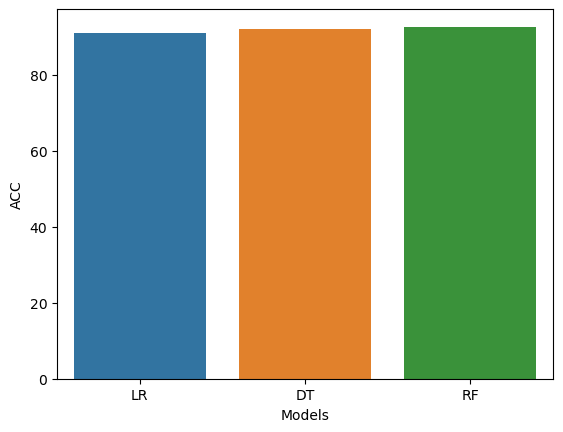

In [61]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

As depicted in the bar plot, it's evident that Logistic Regression is the best-performing model for this dataset after undersampling. This visualization underscores the effectiveness of undersampling in enhancing the model's performance and its significance in addressing imbalanced datasets.

### Oversampling Technique

While undersampling can lead to the loss of valuable data, we are now considering oversampling as an alternative solution. To counteract data imbalance, we will utilize SMOTE (Synthetic Minority Over-sampling Technique), one of the most commonly used oversampling methods.

SMOTE's purpose is to balance class distribution by randomly increasing the number of minority class examples through the generation of synthetic data. Unlike duplication, SMOTE synthesizes new minority instances between existing minority instances. It accomplishes this by generating virtual training records through linear interpolation for the minority class. These synthetic data points are not duplicates but rather slightly different from the original data points.

Now, let's implement SMOTE for oversampling. We will start by reloading our dataset, performing feature scaling, and removing the 'Time' column and duplicate values. As we are preparing the dataset for oversampling, we will store the feature matrix in 'X' and the response variable (target variable) in 'y'. We will also check the shapes of 'X' and 'y before applying SMOTE.

In [62]:
data = pd.read_csv('creditcard.csv')

In [63]:
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [64]:
data = data.drop(['Time'], axis=1)

In [65]:
data = data.drop_duplicates()

In [66]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [67]:
X = data.drop('Class', axis=1)
y = data['Class']

In [68]:
X.shape

(275663, 29)

In [69]:
y.shape

(275663,)

In [70]:
from imblearn.over_sampling import SMOTE

With the SMOTE library imported, we are ready to initiate the oversampling process.

In [71]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [72]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

As evident, we now have an equal number of samples for both normal and fraudulent transactions, thanks to SMOTE oversampling. This balanced dataset is ready for further analysis. Let's proceed with the train-test split.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

## Logistic Regression

Now that we have successfully applied SMOTE oversampling to address class imbalance, we can use logistic regression on the balanced dataset.

Let's begin by training a logistic regression model:

In [74]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

Let's assess the performance of logistic regression on the test set after applying SMOTE oversampling. We will calculate accuracy, precision, recall, and F1 score to gauge the model's effectiveness.

In [75]:
y_pred1 = log.predict(X_test)

The `y_pred1` variable contains the predictions made by the logistic regression model.

To calculate the accuracy of the logistic regression model's predictions on the test set:

In [76]:
accuracy_score(y_test, y_pred1)

0.9445564882444857

To assess precision:

In [77]:
precision_score(y_test, y_pred1)

0.9733968401486989

To calculate the recall score:

In [78]:
recall_score(y_test, y_pred1)

0.9140228714797375

Now, we can compute the F1 score:

In [79]:
f1_score(y_test, y_pred1)

0.9427759702206262

Indeed, the values for accuracy, precision, recall, and F1 score are notably higher after applying SMOTE oversampling. This improvement demonstrates the effectiveness of addressing class imbalance with oversampling techniques like SMOTE.

## Decision Tree Classifier

In [80]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

The 'decision_tree_model' is now successfully trained.

Let's make predictions on the test set using the Decision Tree Classifier:

In [81]:
y_pred2 = dt.predict(X_test)

The `y_pred2` variable contains the predictions made by the Decision Tree Classifier.

To calculate accuracy:

In [82]:
accuracy_score(y_test, y_pred2)

0.9982012427777173

Let's assess precision:

In [83]:
precision_score(y_test, y_pred2)

0.9974584732685849

To calculate the recall score:

In [84]:
recall_score(y_test, y_pred2)

0.9989455120629784

Now, let's compute the F1 score:

In [85]:
f1_score(y_test, y_pred2)

0.998201438848921

## Random Forest Classifier
To use the Random Forest Classifier, we begin by training the model:

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

The 'random_forest_model' is now successfully trained. Please note that the dataset has become larger after oversampling, which may lead to longer training times.
Now, let's make predictions on the test set using the Random Forest Classifier:

In [87]:
y_pred3 = rf.predict(X_test)

The `y_pred3` variable contains the predictions made by the Random Forest Classifier.
To calculate accuracy:

In [88]:
accuracy_score(y_test, y_pred3)

0.9999364075729495

Let's assess precision:

In [89]:
precision_score(y_test, y_pred3)

0.9998727504090166

To calculate the recall score:

In [90]:
recall_score(y_test, y_pred3)

1.0

Now, let's compute the F1 score:

In [91]:
f1_score(y_test, y_pred3)

0.9999363711561361

To visualize the results, we have created a dataframe containing the models and their accuracy scores, and then used a bar plot to display the information:

In [92]:
final_data = pd.DataFrame({'Models': ['LR', 'DT', 'RF'], 'ACC': [accuracy_score(y_test, y_pred1) * 100, accuracy_score(y_test, y_pred2) * 100, accuracy_score(y_test, y_pred3) * 100]})

In [98]:
final_data

,Models,ACC
0,LR,94.455649
1,DT,99.820124
2,RF,99.993641


Now, let's visualize the results:

<Axes: xlabel='Models', ylabel='ACC'>

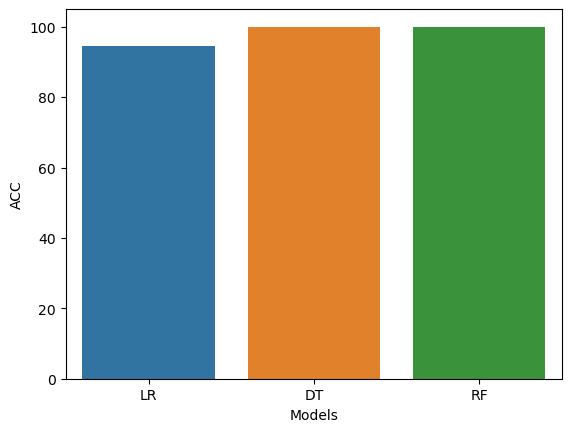

In [93]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])

As shown in the bar plot, it's evident that the Random Forest Classifier is the best model for this dataset after oversampling.

## Saving the Best Random Forest Classifier Model

In this section, we will save our best model, the Random Forest Classifier. After oversampling the dataset using SMOTE, training the model is a time-consuming process. To save time in the future and avoid retraining, we will save the model so that we can perform predictions using the saved model.

### Why Save the Model?

Saving the model is essential when the training process is time-consuming and resource-intensive. By saving the model, we can quickly make predictions without the need to train the model repeatedly.

### Training on the Entire Dataset

In production, we want our model to perform well on real-world data. Therefore, we will train our best model on the entire dataset after oversampling. This ensures that the model is trained on a balanced dataset for better generalization.

To do this, we will create an instance of our best model, the Random Forest Classifier, and train it on the entire dataset after SMOTE. The independent variables are available inside `X_res`, and the dependent variable 'Class' is available inside `y_res`.

In [94]:
rf1 = RandomForestClassifier()
rf1.fit(X_res, y_res)

RandomForestClassifier()

With this step, our Random Forest Classifier will be trained on the complete, balanced dataset, making it ready for use in production scenarios.

Now, let's save our trained model so that we can use it for future predictions.

In [95]:
import joblib

In [96]:
joblib.dump(rf1, "credit_card_model")

['credit_card_model']

With this code, the model is successfully saved under the name "credit_card_model."

In the future, you can load the saved model and use it for predictions:

In [97]:
model = joblib.load("credit_card_model")

sample_input = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

prediction = model.predict([sample_input])

if prediction == 0:
    print("Normal Transaction")
else:
    print("Fraudulent Transaction")

Normal Transaction


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In this example, we load the saved model, provide a sample input for prediction, and check whether it's a normal or fraudulent transaction.